<a href="https://colab.research.google.com/github/KamilShape/whey_analysis/blob/main/Whey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Introduction**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **2.Dataset**

In [2]:
#dataset load
whey = pd.read_csv('/content/whey1.csv', encoding='latin1')

In [3]:
whey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             125 non-null    int64  
 1   Name           125 non-null    object 
 2   Company        125 non-null    object 
 3   Brand          125 non-null    object 
 4   Package        125 non-null    float64
 5   Package_type   125 non-null    object 
 6   Calories       125 non-null    float64
 7   Fat            125 non-null    float64
 8   Saturated_fat  125 non-null    float64
 9   Carbs          125 non-null    float64
 10  Sugar          125 non-null    float64
 11  Protein        125 non-null    float64
 12  WPC            125 non-null    float64
 13  WPI            125 non-null    float64
 14  Soy            125 non-null    float64
 15  Yeast          125 non-null    float64
 16  Pea            125 non-null    float64
 17  Casein         125 non-null    float64
 18  Cannabis  

In [4]:
whey = whey.drop('id', axis=1)

In [5]:
#price per 100g
whey['Price/100'] = whey['Price']/whey['Package']*100

In [6]:
whey.head(10)

,Name,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,Sugar,...,WPC,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100
0,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143
1,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143
2,WPC PROTEIN PLUS 900g,SFD,SFD Nutrition,900.0,bag,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,69.99,7.776667
3,WPC PROTEIN PLUS 2250g,SFD,SFD Nutrition,2250.0,bag,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,154.99,6.888444
4,WPC PROTEIN PLUS 3000g,SFD,SFD Nutrition,3000.0,box,394.0,6.00,4.2,6.9,4.4,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,199.99,6.666333
5,WPC PROTEIN ECONO 750G,SFD,SFD Nutrition,750.0,bag,387.0,6.50,3.5,12.2,6.0,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,44.99,5.998667
6,WPC PROTEIN ECONO 2250G,SFD,SFD Nutrition,2250.0,bag,387.0,6.50,3.5,12.2,6.0,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,139.99,6.221778
7,WPI ISOWHEY INSTANT 700g,SFD,SFD Nutrition,750.0,bag,366.0,1.55,1.0,2.7,2.0,...,0.0,80.24,0.0,0.0,0.0,0.0,0.0,0.0,71.99,9.598667
8,WPI ISOWHEY INSTANT 1800g,SFD,SFD Nutrition,2250.0,bag,366.0,1.55,1.0,2.7,2.0,...,0.0,80.24,0.0,0.0,0.0,0.0,0.0,0.0,169.99,7.555111
9,WHEY PROTEIN 300g,SFD,Allnutrition,300.0,bag,403.0,6.60,3.6,16.0,6.4,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.99,1.663333


In [7]:
#avg price
whey['Price'].mean()

134.30504000000002

In [8]:
#avg price per 100g
whey['Price/100'].mean()

12.283923080098141

(array([38., 42., 16.,  9., 13.,  3.,  2.,  0.,  0.,  2.]),
 array([  4.99,  67.49, 129.99, 192.49, 254.99, 317.49, 379.99, 442.49,
        504.99, 567.49, 629.99]),
 <BarContainer object of 10 artists>)

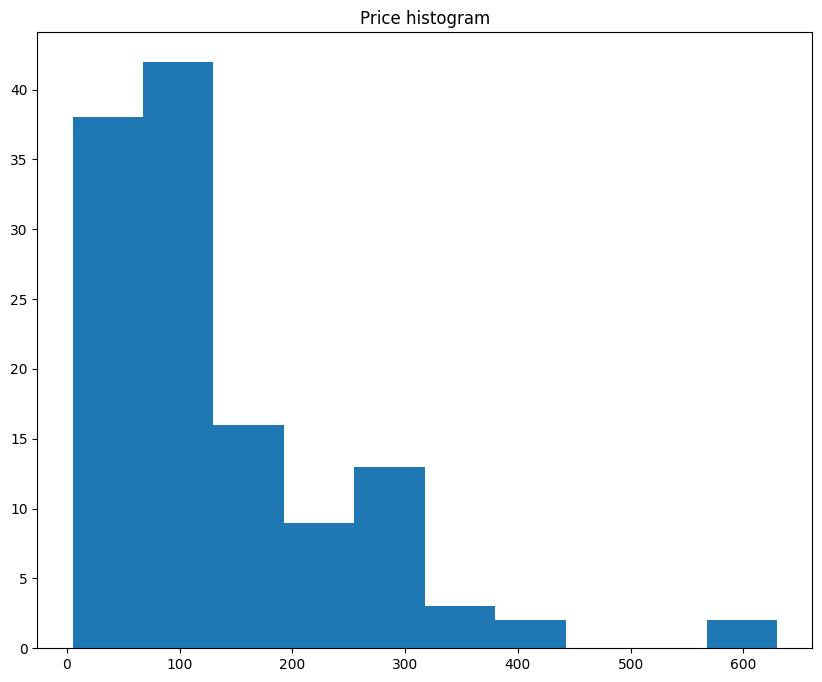

In [9]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Price histogram')
ax.hist(whey['Price'])

In [10]:
#shapiro - wilk test
shapiro_test = stats.shapiro(whey['Price'])
shapiro_test.pvalue
#p<0,05 - no bell curve

3.4009507016152796e-11

#**3.Data Visualisation**

In [11]:
#bar chart function
def bar_chart(ax, x, y, color, title, ylabel):
  ax.bar(x, y, color=color, width=0.6)
  ax.set_title(title)
  ax.set_ylabel(ylabel)

#add text function
def add_text(chart, x, y, move_y, angle, move_x = 0,):
  for i in range(0, len(x)):
    x_value = x[i]
    if type(x[i]) != str:
      x_value = x[i] + move_x
    chart.text(x_value, y[i]-move_y, round(y[i], 2), horizontalalignment='center', rotation=angle)

In [27]:
types = ['WPC',	'WPI',	'Soy',	'Yeast',	'Pea',	'Casein',	'Cannabis',	'Beef']

In [38]:
wpc_price = whey[whey['WPC'] > 0 ]['Price'].mean()
wpi_price = whey[whey['WPI'] > 0 ]['Price'].mean()
soy_price = whey[whey['Soy'] > 0 ]['Price'].mean()
yeast_price = whey[whey['Yeast'] > 0 ]['Price'].mean()
pea_price = whey[whey['Pea'] > 0 ]['Price'].mean()
casein_price = whey[whey['Casein'] > 0 ]['Price'].mean()
cannabis_price = whey[whey['Cannabis'] > 0 ]['Price'].mean()
beef_price = whey[whey['Beef'] > 0 ]['Price'].median()
type_prices = [wpc_price, wpi_price, soy_price, yeast_price, pea_price, casein_price,cannabis_price, beef_price]

In [39]:
wpc_price_100 = whey[whey['WPC'] > 0 ]['Price/100'].mean()
wpi_price_100 = whey[whey['WPI'] > 0 ]['Price/100'].mean()
soy_price_100 = whey[whey['Soy'] > 0 ]['Price/100'].mean()
yeast_price_100 = whey[whey['Yeast'] > 0 ]['Price/100'].mean()
pea_price_100 = whey[whey['Pea'] > 0 ]['Price/100'].mean()
casein_price_100 = whey[whey['Casein'] > 0 ]['Price/100'].mean()
cannabis_price_100 = whey[whey['Cannabis'] > 0 ]['Price/100'].mean()
beef_price_100 = whey[whey['Beef'] > 0 ]['Price/100'].median()
type_prices_100 = [wpc_price_100, wpi_price_100, soy_price_100, yeast_price_100, pea_price_100, casein_price_100, cannabis_price_100, beef_price_100]

In [14]:
type_prices

[138.61329113924054,
 165.74459459459462,
 91.26111111111112,
 162.49,
 84.29333333333334,
 78.945,
 169.9]

In [15]:
types

['WPC', 'WPI', 'Soy', 'Yeast', 'Pea', 'Casein', 'Cannabis', 'Beef']

<ipython-input-16-ec64acebdf0f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


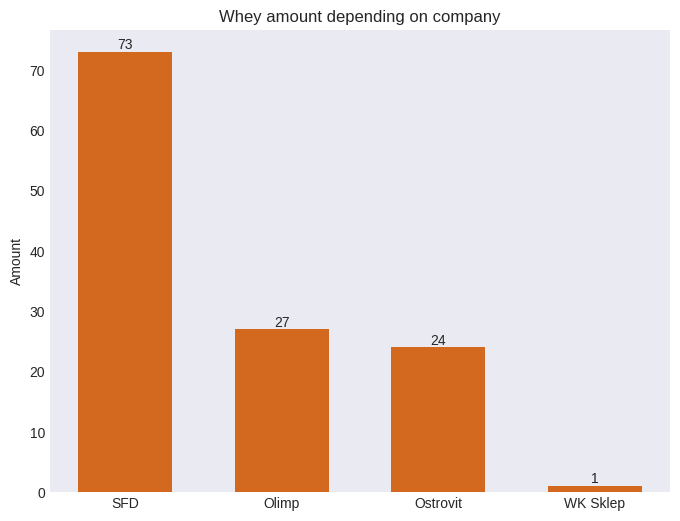

In [16]:
#products amount depending by company in dataset
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize = (8,6))
bar_chart(ax, whey['Company'].value_counts().index, whey['Company'].value_counts().values, 'chocolate', 'Whey amount depending on company', 'Amount' )
add_text(ax, whey['Company'].value_counts().index, whey['Company'].value_counts().values, -0.5, 0)

In [17]:
whey['Package_category'] = pd.cut(whey['Package'], bins = [0, 999, 1999, 5000], labels = ['>1000g', '1000g - 2000g', '>2000g'] )

In [18]:
whey

,Name,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,Sugar,...,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100,Package_category
0,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.0,4.2,6.9,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143,>1000g
1,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.0,4.2,6.9,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143,>1000g
2,WPC PROTEIN PLUS 900g,SFD,SFD Nutrition,900.0,bag,394.0,6.0,4.2,6.9,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.99,7.776667,>1000g
3,WPC PROTEIN PLUS 2250g,SFD,SFD Nutrition,2250.0,bag,394.0,6.0,4.2,6.9,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.99,6.888444,>2000g
4,WPC PROTEIN PLUS 3000g,SFD,SFD Nutrition,3000.0,box,394.0,6.0,4.2,6.9,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.99,6.666333,>2000g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Olimp Provit® 80 - 700 g,Olimp,Olimp,700.0,bag,356.0,3.0,0.2,2.2,2.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.00,9.714286,>1000g
121,Olimp Pure Whey Isolate 95® - 1800 g,Olimp,Olimp,1800.0,bag,352.0,0.5,0.5,1.0,1.0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00,14.333333,1000g - 2000g
122,Olimp Pure Whey Isolate 95® - 2200 g,Olimp,Olimp,2200.0,box,352.0,0.5,0.5,1.0,1.0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,328.00,14.909091,>2000g
123,Olimp Pure Whey Isolate 95® - 600 g,Olimp,Olimp,600.0,box,352.0,0.5,0.5,1.0,1.0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,89.00,14.833333,>1000g


In [19]:
whey['Package_type'][33] = 'bag'

<ipython-input-19-53b2c8795266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whey['Package_type'][33] = 'bag'


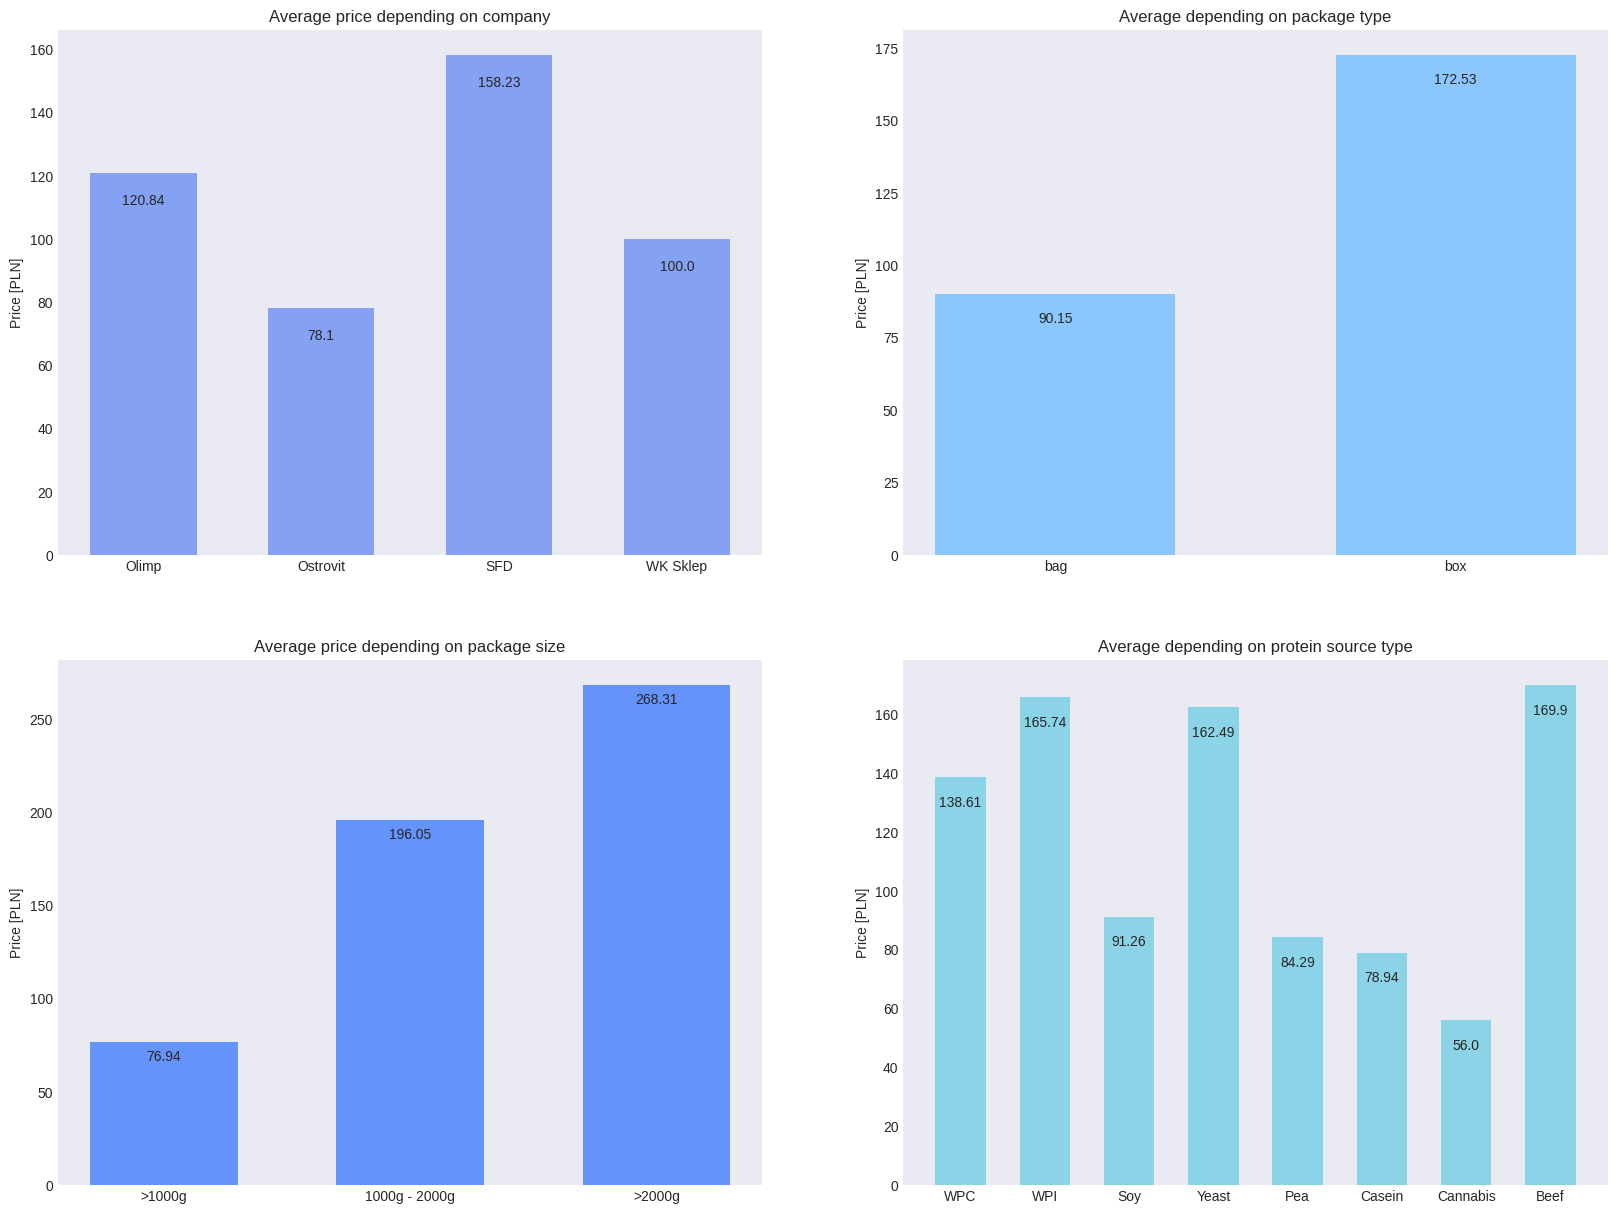

In [41]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

bar_chart(ax[0,0], whey.groupby('Company')['Price'].mean().index, whey.groupby('Company')['Price'].mean().values, '#85A1F2', 'Average price depending on company', 'Price [PLN]')
bar_chart(ax[0,1], whey.groupby('Package_type')['Price'].mean().index, whey.groupby('Package_type')['Price'].mean().values, '#8BC6FC', 'Average depending on package type', 'Price [PLN]')
bar_chart(ax[1,0], whey.groupby('Package_category')['Price'].mean().index, whey.groupby('Package_category')['Price'].mean().values, '#6493FA', 'Average price depending on package size', 'Price [PLN]')
bar_chart(ax[1,1], types, type_prices, '#8BD3E6', 'Average depending on protein source type', 'Price [PLN]')

add_text(ax[0,0], whey.groupby('Company')['Price'].mean().index, whey.groupby('Company')['Price'].mean().values, 10, 0)
add_text(ax[0,1], whey.groupby('Package_type')['Price'].mean().index, whey.groupby('Package_type')['Price'].mean().values, 10, 0)
add_text(ax[1,0], whey.groupby('Package_category')['Price'].mean().index, whey.groupby('Package_category')['Price'].mean().values, 10, 0)
add_text(ax[1,1], types, type_prices, 10, 0)

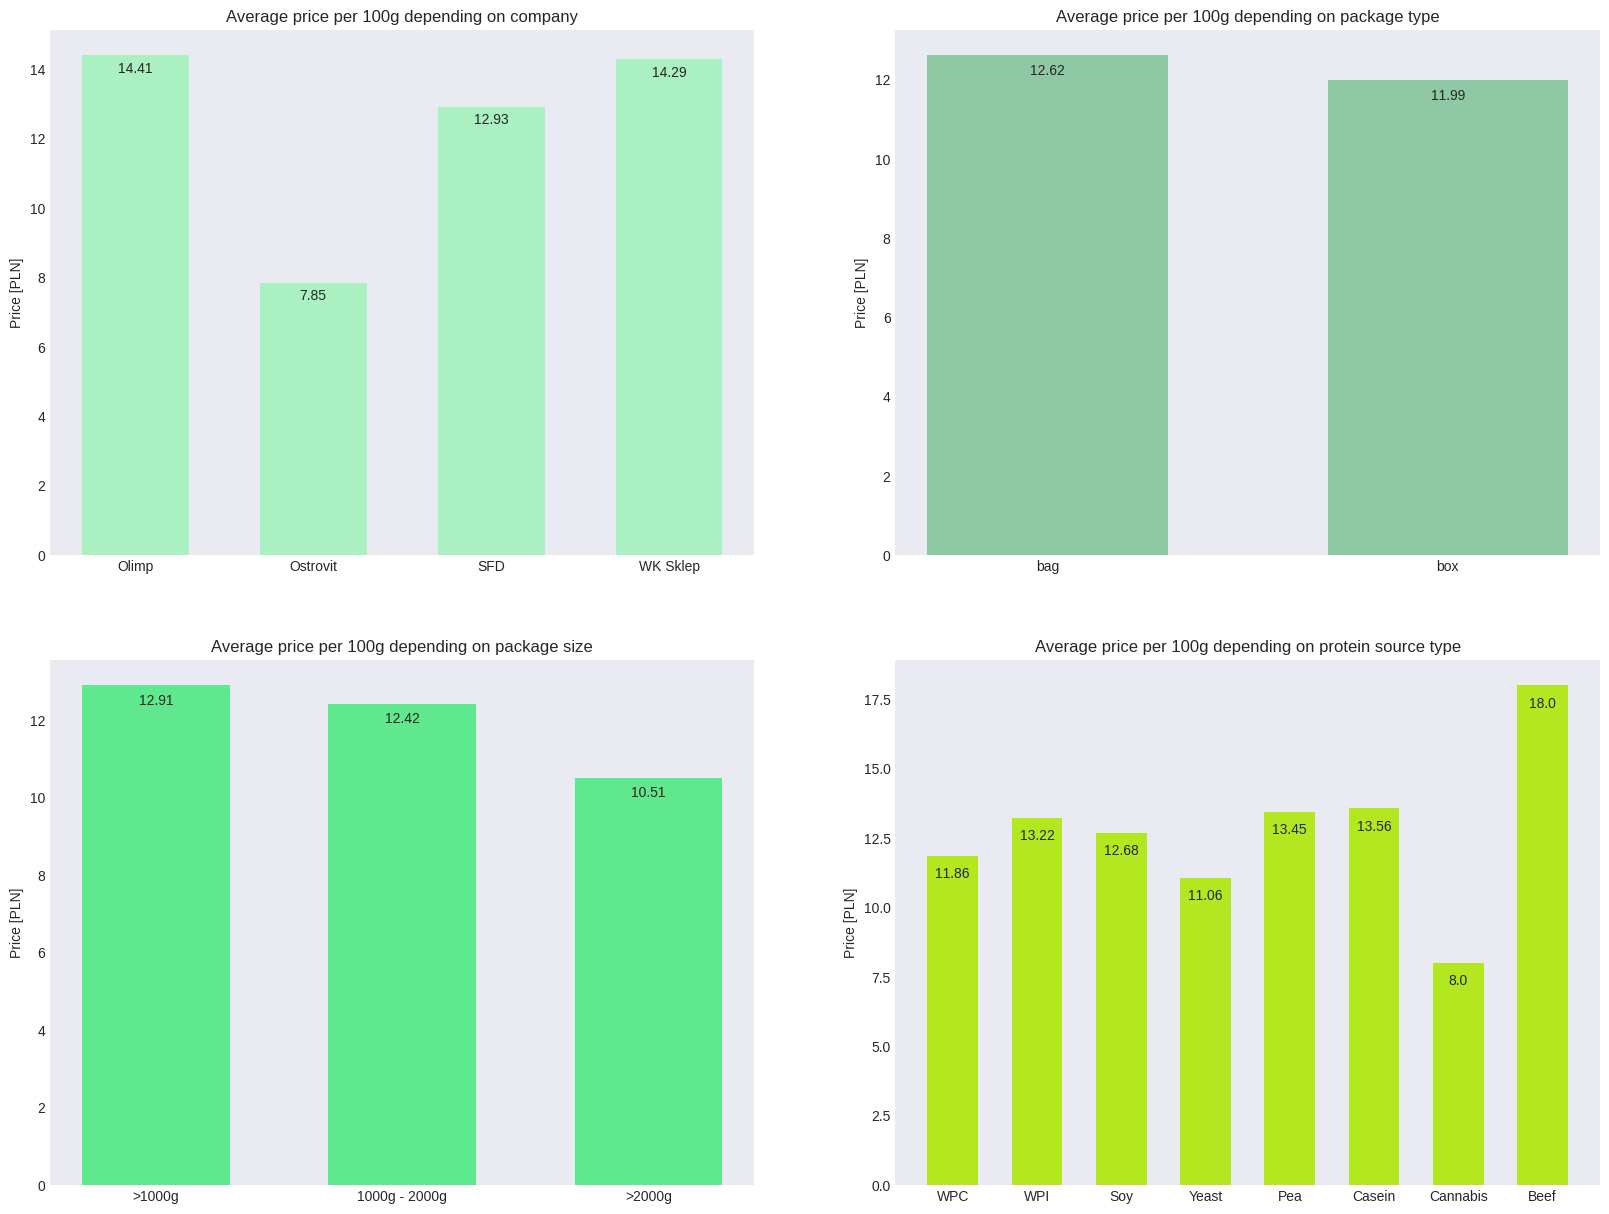

In [47]:
fig, ax = plt.subplots(2,2, figsize = (20,15))


bar_chart(ax[0,0], whey.groupby('Company')['Price/100'].mean().index, whey.groupby('Company')['Price/100'].mean().values, '#AAF0C1', 'Average price per 100g depending on company', 'Price [PLN]')
bar_chart(ax[0,1], whey.groupby('Package_type')['Price/100'].mean().index, whey.groupby('Package_type')['Price/100'].mean().values, '#8FC9A3', 'Average price per 100g depending on package type', 'Price [PLN]')
bar_chart(ax[1,0], whey.groupby('Package_category')['Price/100'].mean().index, whey.groupby('Package_category')['Price/100'].mean().values, '#5FE88D', 'Average price per 100g depending on package size', 'Price [PLN]')
bar_chart(ax[1,1], types, type_prices_100, '#B3E820', 'Average price per 100g depending on protein source type', 'Price [PLN]')

add_text(ax[0,0], whey.groupby('Company')['Price/100'].mean().index, whey.groupby('Company')['Price/100'].mean().values, 0.5, 0)
add_text(ax[0,1], whey.groupby('Package_type')['Price/100'].mean().index, whey.groupby('Package_type')['Price/100'].mean().values, 0.5, 0)
add_text(ax[1,0], whey.groupby('Package_category')['Price/100'].mean().index, whey.groupby('Package_category')['Price/100'].mean().values, 0.5, 0)
add_text(ax[1,1], types, type_prices_100, 0.8, 0)

#**4. Confusion matrix**

In [19]:
whey.iloc[:,4:-1]

,Package_type,Calories,Fat,Saturated_fat,Carbs,Sugar,Protein,WPC,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100
0,bag,394.0,6.0,4.2,6.9,4.4,78.0,97.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143
1,bag,394.0,6.0,4.2,6.9,4.4,78.0,97.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143
2,bag,394.0,6.0,4.2,6.9,4.4,78.0,97.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.99,7.776667
3,bag,394.0,6.0,4.2,6.9,4.4,78.0,97.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.99,6.888444
4,box,394.0,6.0,4.2,6.9,4.4,78.0,97.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.99,6.666333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,bag,356.0,3.0,0.2,2.2,2.2,80.0,80.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.00,9.714286
121,bag,352.0,0.5,0.5,1.0,1.0,86.0,0.000,86.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00,14.333333
122,box,352.0,0.5,0.5,1.0,1.0,86.0,0.000,86.0,0.0,0.0,0.0,0.0,0.0,0.0,328.00,14.909091
123,box,352.0,0.5,0.5,1.0,1.0,86.0,0.000,86.0,0.0,0.0,0.0,0.0,0.0,0.0,89.00,14.833333


In [20]:
whey['Package_type'] = whey['Package_type'].astype('category')
whey['Package_type'] = whey['Package_type'].cat.codes

In [21]:
whey[['Package', 'Package_type', 'Calories', 'Fat', 'Saturated_fat', 'Carbs', 'Sugar', 'Protein', 'Price']]

,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,Sugar,Protein,Price
0,700.0,0,394.0,6.0,4.2,6.9,4.4,78.0,58.99
1,700.0,0,394.0,6.0,4.2,6.9,4.4,78.0,58.99
2,900.0,0,394.0,6.0,4.2,6.9,4.4,78.0,69.99
3,2250.0,0,394.0,6.0,4.2,6.9,4.4,78.0,154.99
4,3000.0,1,394.0,6.0,4.2,6.9,4.4,78.0,199.99
...,...,...,...,...,...,...,...,...,...
120,700.0,0,356.0,3.0,0.2,2.2,2.2,80.0,68.00
121,1800.0,0,352.0,0.5,0.5,1.0,1.0,86.0,258.00
122,2200.0,1,352.0,0.5,0.5,1.0,1.0,86.0,328.00
123,600.0,1,352.0,0.5,0.5,1.0,1.0,86.0,89.00


<Axes: >

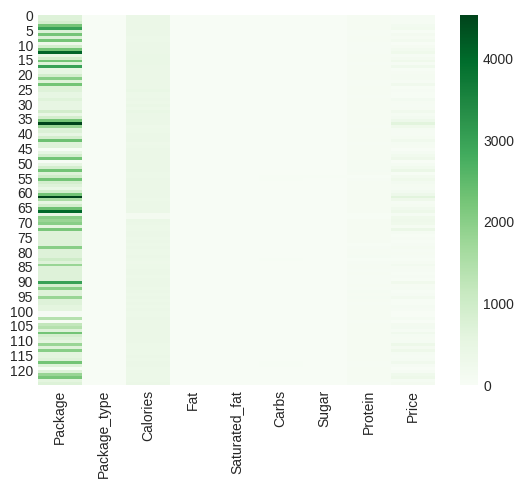

In [22]:
sns.heatmap(whey[['Package', 'Package_type', 'Calories', 'Fat', 'Saturated_fat', 'Carbs', 'Sugar', 'Protein', 'Price']], cmap="Greens")